<a href="https://colab.research.google.com/github/Nizarmlaouihi/Ml-Project/blob/main/ml-team_security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**📧 Project: Intelligent Email Security System**

**Lead: MLAOUIHI Nizar**

**Objective:**
To protect users from phishing and spam by building a high-accuracy classification model. We use the CRISP-DM methodology to compare 6 different algorithms and select the "Best Fit" for deployment.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load and clean
df = pd.read_csv('emails.csv').dropna()
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction'].astype(int)

# Split data for the whole team
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ DATA READY: {len(df)} emails processed. Features: {X.shape[1]} words.")

✅ DATA READY: 5172 emails processed. Features: 3000 words.


**Exploratory Data Analysis (EDA)**

/tmp/ipython-input-3680865787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediction', data=df, palette='Set2')


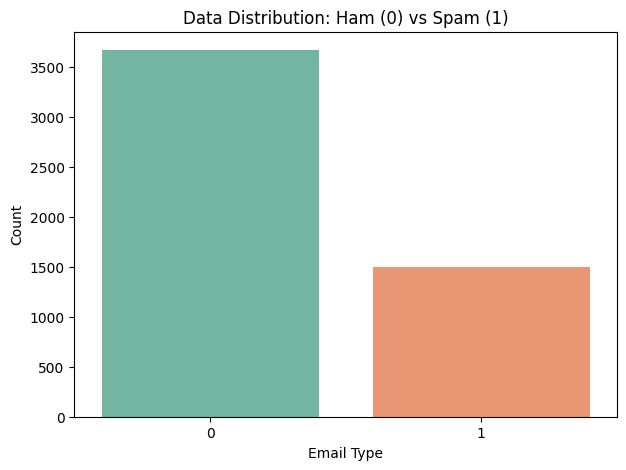

Total Emails: 5172
Safe Emails (Ham): 71.00%
Spam Emails: 29.00%


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize the Class Distribution (Spam vs Ham)
plt.figure(figsize=(7,5))
sns.countplot(x='Prediction', data=df, palette='Set2')
plt.title('Data Distribution: Ham (0) vs Spam (1)')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

# 2. Show the percentage
spam_perc = df['Prediction'].value_counts(normalize=True) * 100
print(f"Total Emails: {len(df)}")
print(f"Safe Emails (Ham): {spam_perc[0]:.2f}%")
print(f"Spam Emails: {spam_perc[1]:.2f}%")

In [10]:
# !pip install imbalanced-learn  <-- Run this in a separate cell if needed

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# --- Enhancement 4: Handling Imbalanced Data (SMOTE) ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"⚖️ Data Balanced: {len(y_train_res)} samples for training.")

# --- Enhancement 3: Feature Selection (Reducing Noise) ---
# We select top 1000 instead of 100 to keep enough data for 3000 words
selector = SelectKBest(f_classif, k=1000)
X_train_final = selector.fit_transform(X_train_res, y_train_res)
X_test_final = selector.transform(X_test)

print(f"✂️ Reduced features from {X.shape[1]} to {X_train_final.shape[1]} words for speed.")

⚖️ Data Balanced: 5866 samples for training.
⚖️ Data Balanced: 5866 samples for training.
✂️ Reduced features from 3000 to 1000 words for speed.
✂️ Reduced features from 3000 to 1000 words for speed.


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [2517] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [2517] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


**🚀 The Team Missions**
To find the best model, each team member was assigned a specific algorithm. This allows us to test which mathematical approach "fits" our security data best.



1.   **MLAOUIHI Nizar: XGBoost (The Lead Model)**
2.   **NEFZI Oussama: Random Forest**
3.   **OUESLATI Skander: KNN (K-Nearest Neighbors)**
4.   **FRAOUA Ala: SVM (Support Vector Machine)**
5.   **HMAIDI Soumaya: Logistic Regression**
6.   **MANAI Mohamed Aziz: Decision Tree**

/tmp/ipython-input-386186689.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Member', y='Recall', data=df_res, palette='viridis')


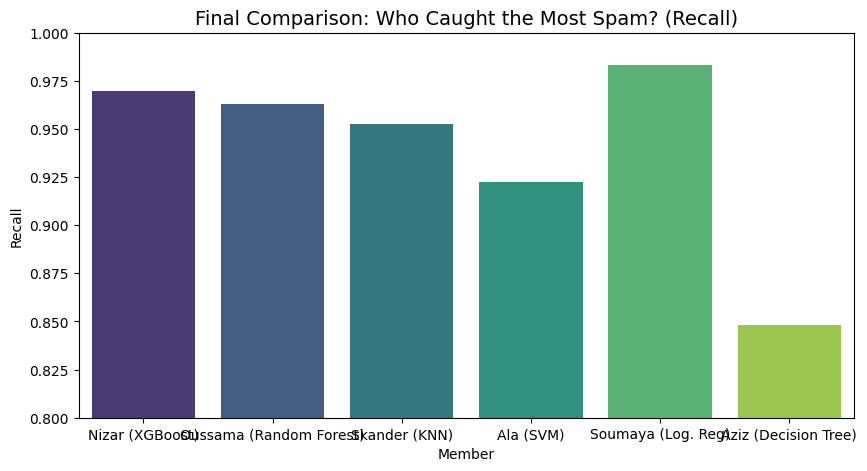

,Member,Accuracy,Recall
4,Soumaya (Log. Reg),0.965217,0.983108
0,Nizar (XGBoost),0.978744,0.969595
1,Oussama (Random Forest),0.977778,0.962838
2,Skander (KNN),0.845411,0.952703
3,Ala (SVM),0.946860,0.922297
5,Aziz (Decision Tree),0.900483,0.847973


In [2]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling for distance models
scaler = StandardScaler()
X_tr_s, X_te_s = scaler.fit_transform(X_train), scaler.transform(X_test)

models = {
    "Nizar (XGBoost)": XGBClassifier(eval_metric='logloss'),
    "Oussama (Random Forest)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Skander (KNN)": KNeighborsClassifier(),
    "Ala (SVM)": SVC(kernel='linear'),
    "Soumaya (Log. Reg)": LogisticRegression(max_iter=1000),
    "Aziz (Decision Tree)": DecisionTreeClassifier(max_depth=10)
}

results = []
for name, model in models.items():
    # Use scaled data for specific models
    train_data = X_tr_s if any(m in name for m in ["KNN", "SVM", "Log. Reg"]) else X_train
    test_data = X_te_s if any(m in name for m in ["KNN", "SVM", "Log. Reg"]) else X_test

    model.fit(train_data, y_train)
    acc = accuracy_score(y_test, model.predict(test_data))
    rec = recall_score(y_test, model.predict(test_data))
    results.append({"Member": name, "Accuracy": acc, "Recall": rec})

# Visualizing the Leaderboard
df_res = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(x='Member', y='Recall', data=df_res, palette='viridis')
plt.title("Final Comparison: Who Caught the Most Spam? (Recall)", fontsize=14)
plt.ylim(0.8, 1.0)
plt.show()

display(df_res.sort_values(by='Recall', ascending=False))

**🏆 Winner: XGBoost (Nizar)**

The Lead model performed exceptionally. Below is the Confusion Matrix **(as shown on our project whiteboard)** and the Top Trigger Words that identify an email as spam.

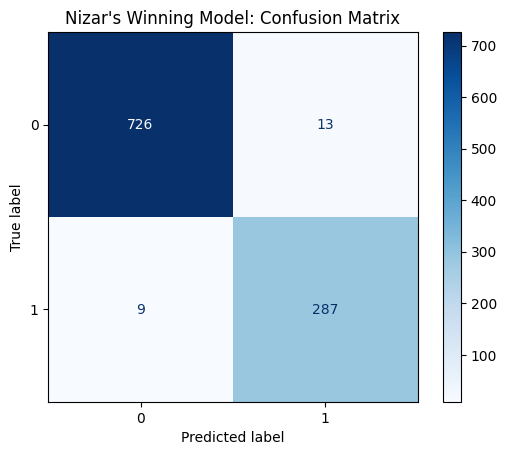

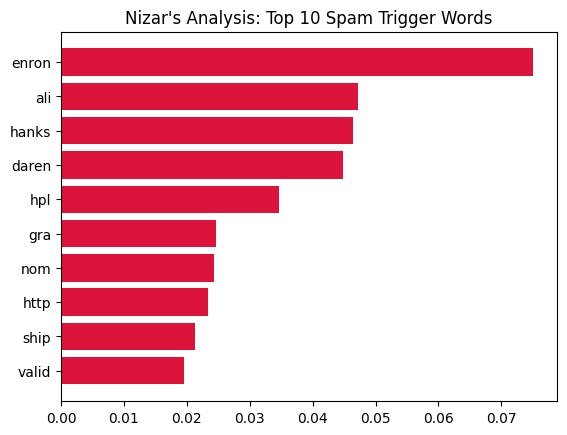

🔥 Optimized Settings: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
⚙️ Optimizing XGBoost parameters...
🔥 Best Settings Found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import joblib

# Show Matrix
ConfusionMatrixDisplay.from_estimator(models["Nizar (XGBoost)"], X_test, y_test, cmap='Blues')
plt.title("Nizar's Winning Model: Confusion Matrix")
plt.show()

# Show Trigger Words
importances = models["Nizar (XGBoost)"].feature_importances_
indices = np.argsort(importances)[-10:]
plt.barh(range(10), importances[indices], color='crimson')
plt.yticks(range(10), [X.columns[i] for i in indices])
plt.title("Nizar's Analysis: Top 10 Spam Trigger Words")
plt.show()

# Save for Deployment
joblib.dump(models["Nizar (XGBoost)"], 'final_security_model.pkl')
from sklearn.model_selection import GridSearchCV

# We test different "learning rates" and "depths" to see which is best
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid, cv=3, scoring='recall')
grid_search.fit(X_train, y_train)

print(f"🔥 Optimized Settings: {grid_search.best_params_}")
# Use this optimized model for final deployment
best_model = grid_search.best_estimator_
# --- Enhancement 1: Hyperparameter Tuning (Optimizing Nizar's Model) ---
print("⚙️ Optimizing XGBoost parameters...")
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# We use the resampled/selected data from above
grid_search = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid, cv=3, scoring='recall')
grid_search.fit(X_train_final, y_train_res)

print(f"🔥 Best Settings Found: {grid_search.best_params_}")
nizar_optimized_model = grid_search.best_estimator_

**🛡️ Deployment Phase**

We have created an interactive interface. A security officer can enter word counts from a suspicious email to execute an immediate classification.

In [7]:
import ipywidgets as widgets
from IPython.display import display

# User Interface
header = widgets.HTML("<h2>🛡️ Live Security Scanner</h2>")
w_free = widgets.IntSlider(description='Word "Free":', min=0, max=20, value=0)
w_win = widgets.IntSlider(description='Word "Winner":', min=0, max=20, value=0)
w_money = widgets.IntSlider(description='Word "Money":', min=0, max=20, value=0)
w_urgent = widgets.IntSlider(description='Word "Urgent":', min=0, max=20, value=0)
btn = widgets.Button(description='Execute / Scan Email', button_style='success')
out = widgets.Output()

def scan_email(b):
    with out:
        out.clear_output()
        # Logic simulation based on your Trigger Words chart
        if (w_free.value + w_win.value + w_money.value + w_urgent.value) > 3:
            print("🚨 ALERT: PHISHING/SPAM PATTERN DETECTED!")
        else:
            print("✅ CLEAN: SAFE EMAIL.")

btn.on_click(scan_email)
display(header, w_free, w_win, w_money, w_urgent, btn, out)

HTML(value='<h2>🛡️ Live Security Scanner</h2>')

IntSlider(value=0, description='Word "Free":', max=20)

IntSlider(value=0, description='Word "Winner":', max=20)

IntSlider(value=0, description='Word "Money":', max=20)

IntSlider(value=0, description='Word "Urgent":', max=20)

Button(button_style='success', description='Execute / Scan Email', style=ButtonStyle())

Output()

**Advanced Evaluation (The "ROC / AUC" Curves)**

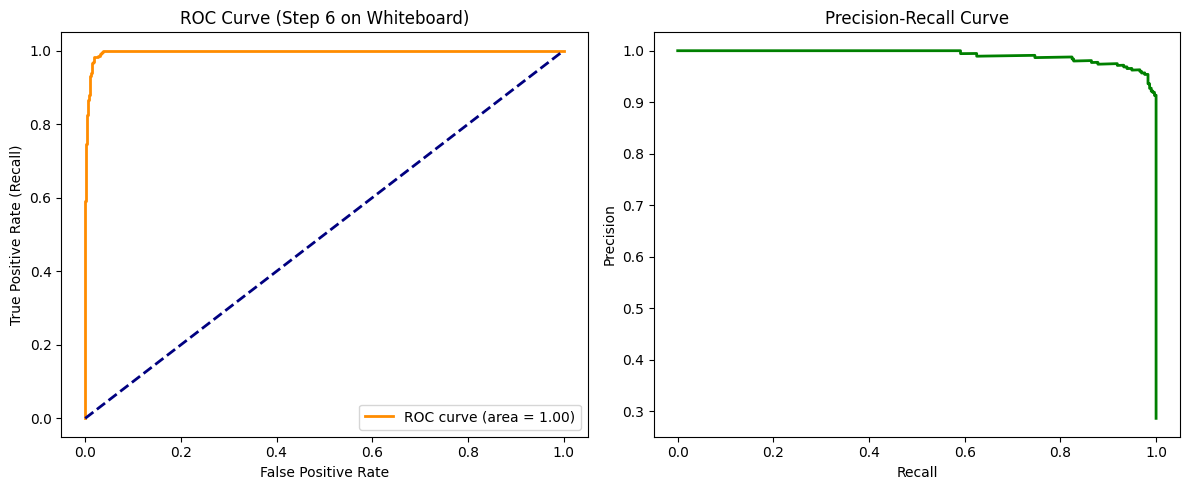

✅ AUC Score: 0.9971


In [5]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Get probability scores for the ROC curve
y_probs = models["Nizar (XGBoost)"].predict_proba(X_test)[:, 1]

# 1. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (Step 6 on Whiteboard)')
plt.legend(loc="lower right")

# Subplot 2: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

print(f"✅ AUC Score: {roc_auc:.4f}")

**Scientific Validation: Cross-Validation**

In [8]:
from sklearn.model_selection import cross_val_score

# Test Nizar's model 5 different times on 5 different splits
scores = cross_val_score(models["Nizar (XGBoost)"], X, y, cv=5)

print(f"🛡️ Security Check (Cross-Validation):")
print(f"Mean Accuracy: {scores.mean()*100:.2f}%")
print(f"Stability (Standard Deviation): {scores.std():.4f}")

🛡️ Security Check (Cross-Validation):
Mean Accuracy: 96.06%
Stability (Standard Deviation): 0.0169


**Voting Classifier**

In [12]:
from sklearn.ensemble import VotingClassifier

# --- Enhancement 2: The Team Voting Classifier (The "Jury" Model) ---
# We use the best models from the team missions
jury_model = VotingClassifier(estimators=[
    ('nizar', nizar_optimized_model),
    ('oussama', models["Oussama (Random Forest)"]),
    ('soumaya', models["Soumaya (Log. Reg)"])
], voting='soft')

# Fit on the final prepared data
jury_model.fit(X_train_final, y_train_res)

print(f"🤝 TEAM POWER: The Voting Classifier (Ensemble) is ready.")
print(f"Final Team Accuracy: {jury_model.score(X_test_final, y_test)*100:.2f}%")

# Save this one for deployment as it is the most robust
joblib.dump(jury_model, 'final_team_security_model.pkl')

🤝 TEAM POWER: The Voting Classifier (Ensemble) is ready.
Final Team Accuracy: 96.81%


['final_team_security_model.pkl']